In [ ]:
import pandas as pd
import plotly.express as px

In [17]:
# Läs in data Covid 19 Vaccine 
file_path_vaccinations = '../Lab1/Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx'


# Läs in filen Folkhalsomyndigheten_Covid19
file_path_covid19 = '../Lab1/Data/Folkhalsomyndigheten_Covid19.xlsx'
#data_covid_19 = pd.read_excel(file_path_covid19)

In [4]:
# Oppna Excel-filen covid vaccinations 
xl_vaccinatios = pd.ExcelFile(file_path_vaccinations) 

# Hämta en lista över alla bladnamn
sheet_names  = xl_vaccinatios .sheet_names
print(sheet_names)

['Vaccinationer tidsserie', 'Vaccinerade tidsserie', 'Vaccinerade tidsserie dos 3', 'Vaccinerade tidsserie dos 4', 'Vaccinerade tidsserie dos 5', 'Dos 1 till 3 per åldersgrupp', 'Dos 4 per åldersgrupp', 'Dos 4 18+', 'Dos 5 per åldersgrupp', 'Vaccinerade kön', 'Vaccinerade kommun', 'Vaccinerade kommun dos 3', 'Vaccinerade kommun dos 4', 'Vaccinerade kommun dos 5', 'Vaccinerade kommun och ålder', 'FOHM 27 OKT 2022']


In [5]:
# Hämta Excel-filen Folkhalsomyndigheten_Covid19
xl_covid = pd.ExcelFile(file_path_covid )

# Hämta en lista över alla bladnamn i Folkhalsomyndigheten_Covid19 filen
sheet_names = xl_covid.sheet_names
print(sheet_names)

['Antal per dag region', 'Antal avlidna per dag', 'Antal intensivvårdade per dag', 'Totalt antal per region', 'Totalt antal per kön', 'Totalt antal per åldersgrupp', 'Veckodata Region', 'Veckodata Kommun_stadsdel', 'Veckodata Riket', 'FOHM 27 Oct 2022']


### KPI 1: Antal nya COVID-19-patienter som behöver intensivvård varje vecka

- Denna KPI representerar antalet nya COVID-19-patienter som behöver intensivvård varje vecka, vilket hjälper oss att förstå belastningen på intensivvårdsavdelningarna över tid.
  
- Denna KPI är avgörande för att förstå COVID-19:s påverkan på vården. En ökning av antalet nya intensivvårdade kan signalera en våg av mer allvarliga fall, medan en miskning kan antyda en avmattning av pandemin eller effektiviteten av folkhälsopolitik.

- Histogrammet visar tydligt perioderna med högre ovh lägre belastning på intensivvården. De nästan tomma perioderna kan undersökas vidare för att förstå bakomliggande faktorer.

- Denna KPI kan även användas för att föruse och förbereda för framtida vårdsbehov i pandemins olika faser. 

### Mål med EDA:
Att undersöka och visualisera antalet nya COVID-19-patienter som behöver intensivvård varje vecka för att förstå belastningen på sjukvårdssystemet över tid.

- Steg i EDA:

1. Datainläsning och -rensning: Vi börjar med att läsa in datan om patienter som behöver intensivvård från Excel-filen och omvandlar datumkolumnen till ett DateTime-format för enkel hantering.

2. Dataaggregering: Datan aggregeras till veckovisa intervall med hjälp av Pandas 'resample' funktion. Detta ger oss en summering av antalet nya intensivvårdspatienter för varje vecka.

3. Visualisering: Användning av Plotly Express för att skapa ett interaktivt stapeldiagram som visar antalet nya intensivvårdspatienter varje vecka. Detta ger en tydlig visuell representation av belastningen på intensivvård över tid.

In [18]:
import pandas as pd
import plotly.express as px

# Ladda in datan för intensivvårdade patienter
covid_intensive_care_data = pd.read_excel(file_path_covid19, sheet_name='Antal intensivvårdade per dag')

# Konvertera datumkolumnen till datetime-format och ställ in den som index
covid_intensive_care_data['Datum_vårdstart'] = pd.to_datetime(covid_intensive_care_data['Datum_vårdstart'])

# Sammanställ datan till veckovis frekvens och summera antalet intensivvårdspatienter
covid_intensive_care_data.set_index('Datum_vårdstart', inplace=True)
weekly_intensive_care = covid_intensive_care_data.resample('W').sum().reset_index()

# Skapa ett histogram med Plotly Express
fig = px.bar(weekly_intensive_care, x='Datum_vårdstart', y='Antal_intensivvårdade', title='Antal nya COVID-19-patienter som behöver intensivvård varje vecka')
fig.show()


## KPI 2: Andel av befolkningen i åldersgruppen 12-15 som har fått minst en dos av COVID-19-vaccinet

- Denna KPI visar andelen av befolkningen i åldersgruppen 12-15 som har fått minst en dos av COVID-19-vaccinet. Detta hjälper till att spåra vaccinationsframstegen bland yngre populationer och är viktigt för att säkerställa att ungdomar är skyddade, speciellt i skolmiljöer.

- Det observerades att åldersgruppen 12-15 endast har uppnått en vaccinationsgrad för 1 och 2 doser, vilket tyder på att strategier för fullständig vaccination inklusive boosterdoser ännu inte implementerats eller inte är rekommenderade för denna åldersgrupp.

- Denna KPI är avgörande för att utvärdera effektiviteten av vaccinationskampanjer riktade mot yngre åldersgrupper och för att identifiera potentiella hinder för fullständig vaccination.

- Diagrammet visar tydligt att det finns en skillnad i vaccinationsgrad mellan grundläggande doser och ytterligare boosterdoser i denna åldersgrupp, vilket kan motivera ytterligare undersökningar för att förstå orsakerna bakom denna trend.

- Genom att övervaka denna KPI kan hälsomyndigheterna bättre förstå hur väl denna demografiska grupp är skyddad och vid behov anpassa sina strategier för att öka täckningsgraden.

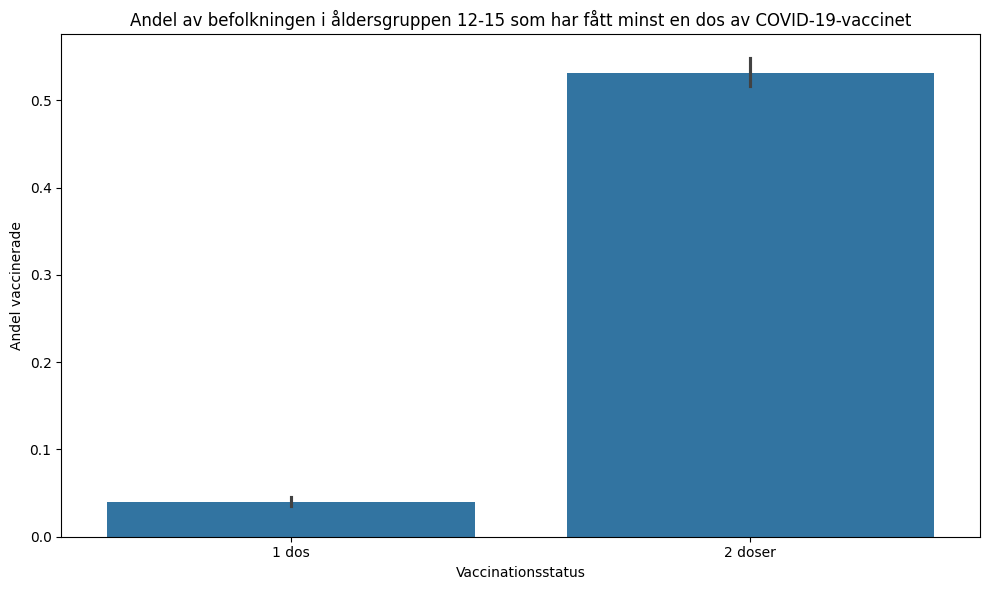

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ladda in datan för vaccinerade i åldersgruppen 12-15
vaccine_age_group_data = pd.read_excel(file_path_vaccinations, sheet_name='Dos 1 till 3 per åldersgrupp')

# Filtrera datan för åldersgruppen 12-15 och för minst en dos
vaccine_12_15_data = vaccine_age_group_data[(vaccine_age_group_data['Åldersgrupp'] == '12-15') & 
                                            (vaccine_age_group_data['Vaccinationsstatus'] != '3 doser')]

# Plotta datan med Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=vaccine_12_15_data['Vaccinationsstatus'], y=vaccine_12_15_data['Andel vaccinerade'])
plt.xlabel('Vaccinationsstatus')
plt.ylabel('Andel vaccinerade')
plt.title('Andel av befolkningen i åldersgruppen 12-15 som har fått minst en dos av COVID-19-vaccinet')
plt.tight_layout()
plt.show()


### Mål med EDA:
Att analysera vaccinationsgraden bland ungdomar i åldersgruppen 12-15 år för att förstå framstegen i vaccinationskampanjen för denna åldersgrupp.

- Steg i EDA:

- Datainläsning och filtrering: Läs in data om vaccination från den relevanta Excel-filen. Filtrera sedan datan för att fokusera på åldersgruppen 12-15 år.

- Dataanalys: Undersök andelen av befolkningen i denna åldersgrupp som har fått olika doser av vaccinet (första och andra dos).

- Visualisering: Använt Seaborn för att skapa ett tydligt stapeldiagram som visar andelen vaccinerade i åldersgruppen 12-15 år, uppdelat på vaccinationsstatus (1 dos, 2 doser). Detta ger insikt i vaccinationsgraden bland ungdomar.

